# 📚 Induction & Asymptotics — Interactive Summary

This notebook accompanies *Lesson 1*. It includes:
1) A quick **introduction** to proof by induction.  
2) **Asymptotic notation** definitions and examples.  
3) **Executable cells** plotting common growth rates and checking ratios.

> No external links are embedded. Add your own Zoom link in the course README if needed.


## 1. Proof by Induction — Theory

**Goal:** Prove a statement \(P(n)\) for all integers \(n \ge n_0\).

**Weak induction**
1. **Base case:** Prove \(P(n_0)\).
2. **Inductive hypothesis:** Assume \(P(k)\) holds for some \(k \ge n_0\).
3. **Inductive step:** Prove \(P(k+1)\) using the hypothesis.

**Strong induction** is similar, but you may assume \(P(n_0), P(n_0+1), \dots, P(k)\) to prove \(P(k+1)\).

**Example (classic):** Prove \(\sum_{i=1}^{n} i = \frac{n(n+1)}{2}\) for all \(n\ge 1\).
- Base: \(n=1\), LHS \(=1\), RHS \(=\frac{1\cdot2}{2}=1\).
- Step: Assume true for \(n=k\). Then
  \[
  \sum_{i=1}^{k+1} i = \left(\sum_{i=1}^{k} i\right) + (k+1)
  = \frac{k(k+1)}{2} + (k+1) = \frac{(k+1)(k+2)}{2}.
  \]


## 2. Asymptotic Notation — Definitions

Let \(f, g : \mathbb{N}\to\mathbb{R}_{\ge 0}\). For sufficiently large \(n\):

- **Big‑O:** \(f(n)=O(g(n))\) if \(\exists c,n_0: \forall n\ge n_0,\, f(n)\le c\,g(n)\).  
- **Big‑Ω:** \(f(n)=\Omega(g(n))\) if \(\exists c,n_0: \forall n\ge n_0,\, f(n)\ge c\,g(n)\).  
- **Big‑Θ:** \(f(n)=\Theta(g(n))\) if both \(O\) and \(\Omega\) hold.  
- **little‑o:** \(f(n)=o(g(n))\) if \(\lim_{n\to\infty}\frac{f(n)}{g(n)}=0\).  
- **little‑ω:** \(f(n)=\omega(g(n))\) if \(\lim_{n\to\infty}\frac{f(n)}{g(n)}=+\infty\).

**Useful facts**
- Logs: \(\log_a n = \frac{\log_b n}{\log_b a}\) → base change is a constant factor.  
- Polynomials: if \(d_1<d_2\) then \(n^{d_1}=o(n^{d_2})\).  
- Exponentials dominate polynomials: \(n^k=o(a^n)\) for any \(a>1\).


## 3. Plot common growth rates

We'll compare `log n`, `n`, `n log n`, `n^2`, and `2^n`.  
Adjust the range if your machine struggles with `2^n`.


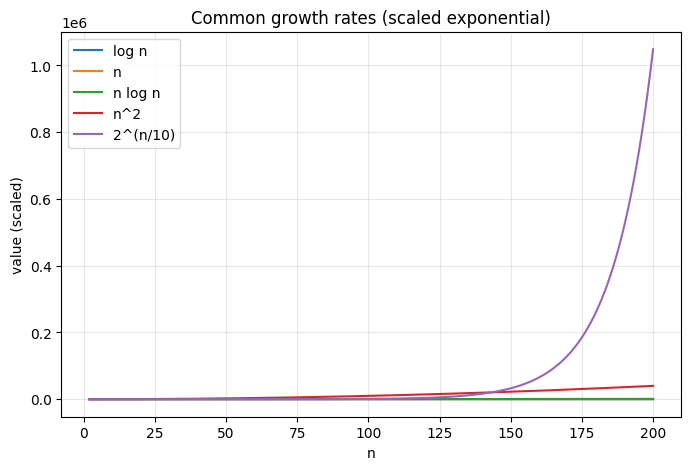

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(2, 201)  # start at 2 to avoid log(1)=0 issues
logn = np.log(n)
n1 = n
nlogn = n * np.log(n)
n2 = n**2
exp2n = 2**(n/10)  # tame exponential so it fits the same axes over this range

plt.figure(figsize=(8,5))
plt.plot(n, logn, label='log n')
plt.plot(n, n1, label='n')
plt.plot(n, nlogn, label='n log n')
plt.plot(n, n2, label='n^2')
plt.plot(n, exp2n, label='2^(n/10)')
plt.xlabel('n')
plt.ylabel('value (scaled)')
plt.title('Common growth rates (scaled exponential)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. Ratio checks (little‑o intuition)

We test limits numerically to build intuition.

- Check whether \(\frac{\log n}{n}\to 0\) (expect **yes** → \(\log n = o(n)\)).  
- Check whether \(\frac{n \log n}{n^2}\to 0\) (expect **yes** → \(n\log n = o(n^2)\)).


In [2]:
n = np.arange(10, 100000, 10, dtype=float)
rat1 = np.log(n)/n
rat2 = (n*np.log(n))/(n**2)

print('max(log n / n) over range:', rat1.max())
print('min(log n / n) near end  :', rat1[-1])
print('max((n log n)/n^2) over range:', rat2.max())
print('min((n log n)/n^2) near end  :', rat2[-1])

max(log n / n) over range: 0.23025850929940458
min(log n / n) near end  : 0.0001151397685765566
max((n log n)/n^2) over range: 0.2302585092994046
min((n log n)/n^2) near end  : 0.0001151397685765566


## 5. (Optional) Symbolic check with SymPy

We can verify closed forms to support the inductive pattern (not a proof, just algebraic confirmation).


In [3]:
import sympy as sp
n = sp.symbols('n', positive=True, integer=True)
lhs = sp.summation(sp.Symbol('i'), (sp.Symbol('i'), 1, n))
rhs = n*(n+1)/2
print('Sum 1..n equals n(n+1)/2 ? ->', sp.simplify(lhs - rhs) == 0)

Sum 1..n equals n(n+1)/2 ? -> True
